In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [2]:
df = pd.read_csv("diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


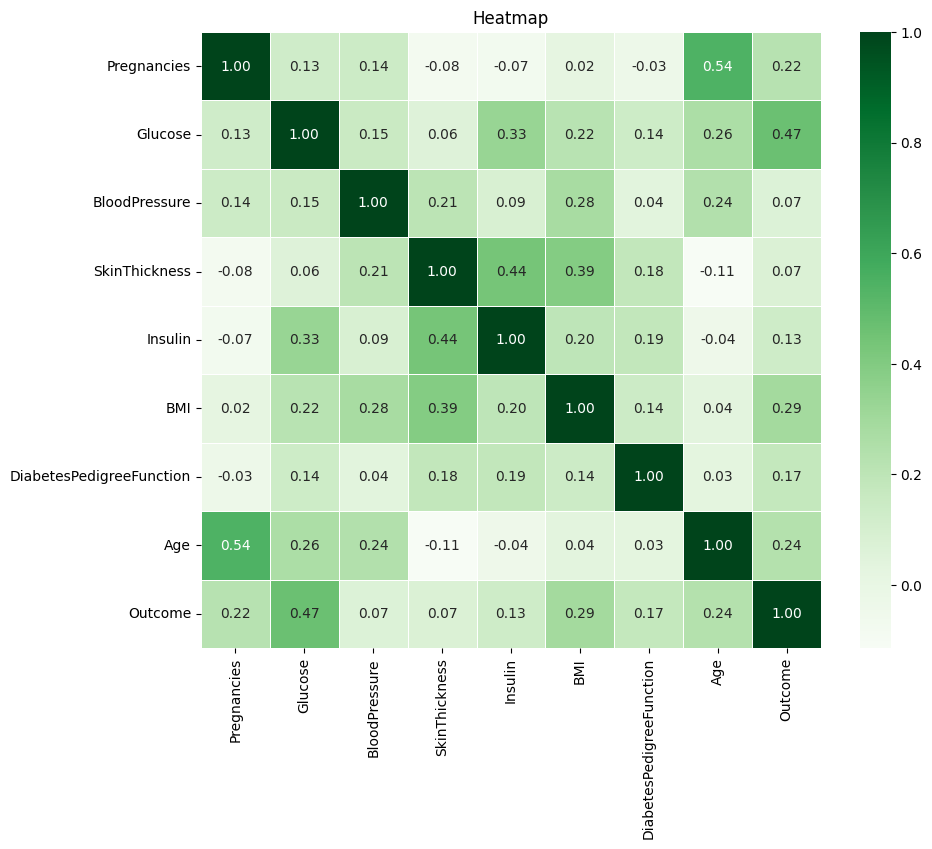

In [3]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
plt.title("Heatmap")
plt.show()

In [4]:
df = df.drop(['BloodPressure', 'SkinThickness', "Insulin", "DiabetesPedigreeFunction"], axis=1) # Dropping variables with weak correlation with Outcome (correlation < 0.20)

In [5]:
print(df['Outcome'].value_counts()) #Checking for class imbalance

Outcome
0    500
1    268
Name: count, dtype: int64


In [6]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

undersample = RandomUnderSampler(random_state=42) #Resampling to create a balanced dataset
X_resampled, y_resampled = undersample.fit_resample(X, y)

print(y_resampled)


556    0
117    0
572    0
251    0
161    0
      ..
755    1
757    1
759    1
761    1
766    1
Name: Outcome, Length: 536, dtype: int64


In [10]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

X_resampled = np.array(X_resampled) #Converting to numpy arrays from pandas dataframe
y_resampled = np.array(y_resampled)

loo = LeaveOneOut() #LOOCV

rf = RandomForestClassifier(random_state=42)

accuracies = [] #List for storing reuslts
y_true = []
y_pred = []

#LOOCV
for train_index, test_index in loo.split(X_resampled):
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]


    scaler = StandardScaler() #scaling
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    rf.fit(X_train, y_train) #Model fit

    y_true.append(y_test[0])  
    y_pred.append(rf.predict(X_test)[0])  
    accuracies.append(accuracy_score(y_test, rf.predict(X_test)))

final_accuracy = sum(accuracies) / len(accuracies) # Calculate final results
print(f"LOOCV Accuracy: {final_accuracy:.2f}")
print(classification_report(y_true, y_pred))


LOOCV Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       268
           1       0.76      0.76      0.76       268

    accuracy                           0.76       536
   macro avg       0.76      0.76      0.76       536
weighted avg       0.76      0.76      0.76       536

